## 2D IR-IR-Raman spectrum of liquid water

This example uses the file 'dip_pol_neq_2d.converged' that contains a response function with 125 fs along t1 and t2.

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.ndimage
import scipy.fft
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.patches as mpatches

### Define constants and parameters of the calculation.

In [2]:
# Useful constants.
fstoau = 41.34137  # Femtosecond to a.u.
autocm1 = 219474.63  # a.u. (Hartree energy unit) to wavenumber
invfstocm1 = autocm1 / fstoau  # fs^-1 to cm^-1 conversion

In [3]:
# Processing parameters
dt = 1 * fstoau  # Timestep 1 fs
nsteps = 125  # Number of steps in Rt
npad = 1125  # Padding for FFT
nplot = 175  # Number of frequency steps to plot.
dw = 2 * np.pi / (nsteps + npad + 1) / dt * autocm1  # Frequency step for fft
wmin = 0  # Minimum frequency in the plot
wmax = nplot * dw  # Maximum frequency in the plot

# Damping to avoid a hard cut off at long t_1/t_2.
tau = 5e28
damping = np.array(
    [
        [np.exp(-(((i + j) * dt / fstoau) ** 12) / tau) for i in range(nsteps + 1)]
        for j in range(nsteps + 1)
    ]
)

### Import response function and compute spectrum.

In [4]:
# Import Rt.
Rt = np.loadtxt("dip_pol_neq_2d.converged")
# Rt = np.gradient(RtRaw,dt,axis=0,edge_order=2)
# Pad with zeros before Fourier transforming to obtain a smooth spectrum (reduce frequency step).
Rt_padded = np.pad(Rt * damping, ((0, npad), (0, npad)))
# Sine transform over first time axis (sine trasnform is equivalent to the imaginary part of the Fourier transform).
St_partial = np.imag(scipy.fft.fft(Rt_padded, axis=0))
# Sine transform over the second time axis.
St_raw = np.imag(scipy.fft.fft(St_partial, axis=1))
# Take the part of the spectrum that we want to plot, multiply by dt**2 to get the right units and scaling. We divide by 10**6 for convenience here, so the units will be [10**6 a.u.].
St = St_raw[: nplot + 1, : nplot + 1] * dt**2 / 10**6

### Plot spectrum.

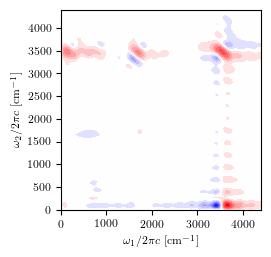

In [5]:
plt.rc("text", usetex=True)
plt.rc("font", **{"family": "serif", "serif": ["Computer Modern"], "size": 8})
plt.rcParams["contour.negative_linestyle"] = "solid"
plt.rcParams["contour.linewidth"] = 0.01
vmin = -0.51
vmax = 0.51
levels = np.arange(vmin, vmax, 0.06)

fig, ax = plt.subplots(1, 1, figsize=(3.3, 2.6))
cs = ax.contourf(
    St.T,
    levels=levels,
    vmin=vmin,
    vmax=vmax,
    cmap=mpl.cm.bwr,
    extend="both",
    extent=(wmin, wmax, wmin, wmax),
)  # plots color map
cs2 = ax.contour(
    St.T,
    levels=levels,
    vmin=vmin,
    vmax=vmax,
    colors="tab:gray",
    extent=(wmin, wmax, wmin, wmax),
    alpha=0.4,
)  # plots contour lines
ax.set_xlim([0, 4400])
ax.set_ylim([0, 4400])
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel(r"$\omega_1 / 2 \pi c\ [\rm{cm}^{-1}]$")
ax.set_ylabel(r"$\omega_2 / 2 \pi c\ [\rm{cm}^{-1}]$")

plt.show()